In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler



warnings.filterwarnings('ignore')

Using TensorFlow backend.


## 0. Importando os dados. Foi feito uma sample de 5 para verificar os dados neste primeiro momento.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train0 = train[ train['target']==0 ].copy()
train1 = train[ train['target']==1 ].copy()


In [3]:
train.sample(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
130418,train_130418,0,7.8426,-1.5543,11.5336,5.2705,10.3842,-14.3013,6.1226,18.3382,...,-5.3017,4.4186,0.1437,8.9841,21.7809,-1.2290,14.0079,9.6328,17.6645,-8.9235
63537,train_63537,0,12.4783,-8.5913,16.1771,3.6999,8.0292,-3.5313,3.7778,20.0872,...,2.0108,10.7406,-0.2464,-0.2337,20.1813,-1.8760,-5.1820,9.5551,17.0668,10.2442
74900,train_74900,0,14.3728,-5.5281,14.2343,7.0691,13.3844,0.1225,4.6069,14.8458,...,0.3058,8.1056,2.3197,3.0642,14.2494,1.9200,1.6014,10.3135,17.4463,1.3593
22657,train_22657,0,13.5574,-0.8751,10.5153,4.6596,9.7273,-5.0788,6.3898,18.4941,...,-2.1656,2.0147,0.2599,0.7975,22.8552,-0.3025,1.7661,7.5887,12.8161,2.2527
167197,train_167197,0,11.5860,-5.3289,10.7697,4.7030,12.1309,0.0192,5.2534,13.0071,...,8.3178,8.4934,2.0590,0.5751,16.2605,-1.8400,-4.7102,9.2883,14.0727,-2.0472


In [4]:
test.sample(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
5319,test_5319,7.3607,-6.4899,11.2056,8.4059,10.6646,1.7642,5.3253,19.2737,5.2416,...,3.6405,5.2410,-0.9434,7.7032,15.6859,0.4145,-2.0842,8.8186,17.7970,-11.1946
112471,test_112471,10.7152,2.4029,9.5036,8.8698,8.4129,3.5356,5.6834,14.9215,-5.1505,...,-0.5629,8.0619,0.2139,2.3586,17.6035,-0.0330,2.4888,7.5743,19.1788,2.6316
151969,test_151969,9.9269,-8.4719,8.0590,10.1684,10.8910,3.3115,5.7968,15.5784,4.0891,...,2.8644,1.8939,1.3131,6.2808,21.0762,-1.4254,4.0156,8.5100,16.3602,8.0562
175553,test_175553,10.2367,-7.4338,10.1017,7.1136,10.9059,-6.7601,5.5236,16.5312,4.7037,...,1.9247,10.6634,2.7624,-0.8372,22.8329,-0.6903,1.5189,8.6504,16.2661,-3.6317
180578,test_180578,13.5635,-0.8516,9.8378,9.2194,13.1999,4.0739,6.2645,20.3727,-0.0837,...,7.7693,2.6451,3.1542,1.8199,17.1703,1.7754,8.9166,9.9500,19.8119,-11.0535


In [5]:
# verificando as classes da variável alvo
train.target.unique()

array([0, 1])

## 1. Explorando os dados

In [6]:
train.shape #Tamanho da amostra do arquivo "TRAIN", 200.000 entradas e 202 colunas, com 199 variáveis

(200000, 202)

In [7]:
train.info() # Verificando a informação das colunas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [8]:
test.shape #Tamanho da amostra do arquivo "TEST", 200.000 entradas e 202 colunas, com 200 variáveis

(200000, 201)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [10]:
sample.shape #Tamanho da amostra do arquivo "TEST", 200.000 entradas e 2 colunas.

(200000, 2)

In [11]:
sample.sample(5)

,ID_code,target
66778,test_66778,0
182666,test_182666,0
117414,test_117414,0
181382,test_181382,0
132076,test_132076,0


In [12]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
ID_code    200000 non-null object
target     200000 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [13]:
# A função abaixo é para verificar se existe alguma coluna com informação nula.

In [14]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [15]:
%time #Abaixo 
missing_data(train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [16]:
%%time
missing_data(test)

CPU times: user 3.44 s, sys: 289 ms, total: 3.73 s
Wall time: 1.91 s


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [17]:
%%time
train.describe()

CPU times: user 1.76 s, sys: 175 ms, total: 1.94 s
Wall time: 1.95 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [18]:
%%time
test.describe()

CPU times: user 2.23 s, sys: 123 ms, total: 2.35 s
Wall time: 2.36 s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


## Analisando as informações acima, o desvio padrão estre os datasets estão bem distantes...

In [19]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('dark')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=10)
    plt.show();

<Figure size 432x288 with 0 Axes>

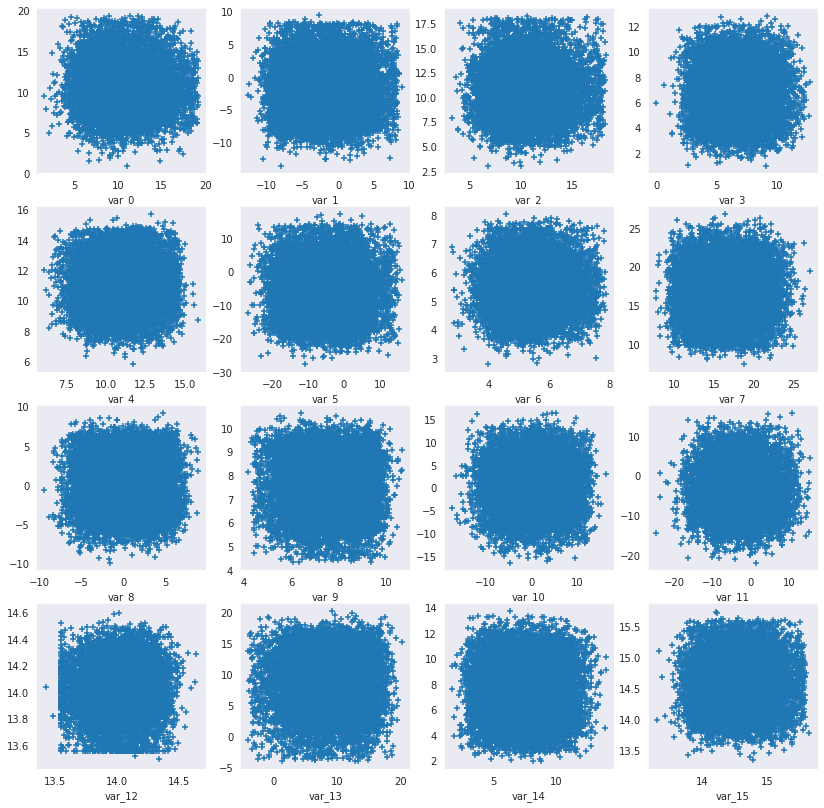

In [20]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(train[::20],test[::20], features)

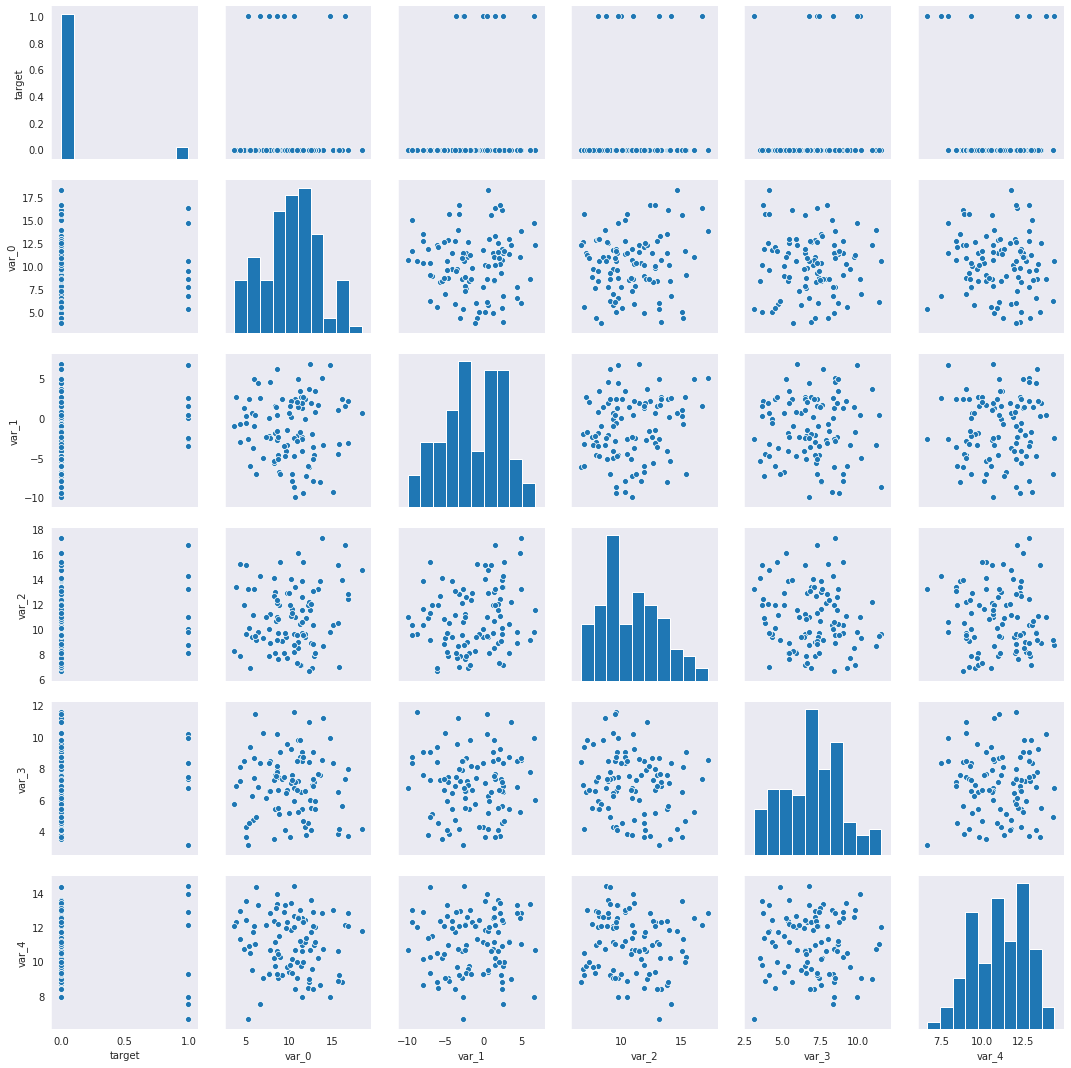

In [21]:
sns.pairplot(train.iloc[0:100, 0:7])

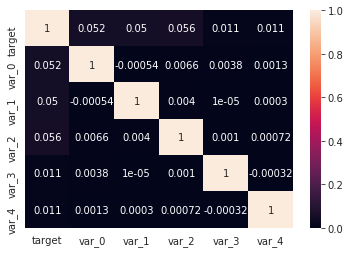

In [22]:
sns.heatmap(train.iloc[:, 0:7].corr(), annot=True)

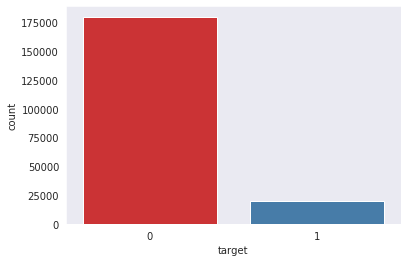

In [23]:
sns.countplot(train['target'], palette='Set1')

In [24]:
# verificando a contagem das classes
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [25]:
print("Existem {}% valores target com 1".format(100 * train["target"].value_counts()[1]/train.shape[0]))

Existem 10.049% valores target com 1


In [26]:
train_0 = train[train.target==0] 
train_1 = train[train.target==1]
train_0 = train.sample(n=268, replace=True)
train = pd.concat([train, train_1], ignore_index=True)

In [27]:
# verificando a contagem das classes
train.target.value_counts()

0    179902
1     40196
Name: target, dtype: int64

In [28]:
train.columns[2 :]#Balanceando
X = train.loc[:, train.columns[2 :]]
X.head()
y = train[['target']]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [29]:
ros = RandomOverSampler(random_state=42) #Balanceando
X_res, y_res = ros.fit_resample(X, y)
X_res.shape
X.shape

(220098, 200)

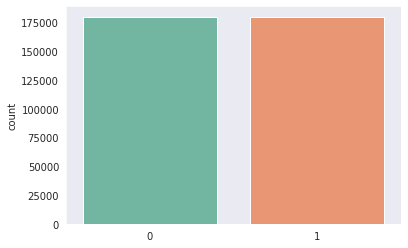

In [30]:
sns.countplot(y_res, palette='Set2')

In [31]:
y.target.value_counts()

0    179902
1     40196
Name: target, dtype: int64

In [32]:
#features = [c for c in train.columns if c not in ['ID_code', 'target']] #Balanceando
#X = train[features]
#X.head()
#y = train[['target']]
#y.head()

In [33]:
train["target"] = train.target.astype("category")
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')   # instanciando o modelo
%time lr.fit(X_train, y_train)                # ajustando o modelo
y_pred = lr.predict(X_test)                   # calculando os preditos
lr.score(X_test, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
CPU times: user 3min 47s, sys: 219 ms, total: 3min 48s
Wall time: 3min 48s


0.8639027714675148

In [36]:
%time
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 9.54 µs


array([[34611,  1370],
       [ 4621,  3418]])

In [37]:
%time
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs
Accuracy: 0.8639027714675148
Precision: 0.7138680033416875
Recall: 0.42517726085333996


CPU times: user 36 µs, sys: 0 ns, total: 36 µs
Wall time: 5.48 µs


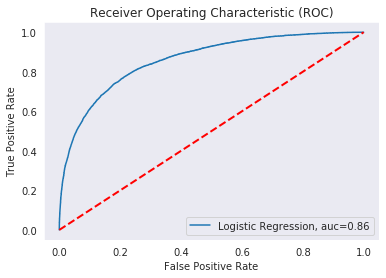

In [38]:
%time
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Logistic Regression, auc=%0.2f" % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc=4)
plt.show()

In [39]:
submission = pd.read_csv('sample_submission.csv')

In [40]:
submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [41]:
submission.tail()

,ID_code,target
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0
199999,test_199999,0


In [42]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
submission.head(20)

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,0
8,test_8,0
9,test_9,0


In [45]:
submission.to_csv('submission_new.csv', index=False)